# Level Acceleration

This notebook demonstrates the calculation of climb performance from a level acceleration test using the procedure as described by Nigel Speedy at - [Using Level Accelerations to Determine Climb Performance](https://www.kitplanes.com/using-level-accelerations-to-determine-climb-performance/)

Some common notebook setup.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Load in the data.

In [2]:
data = np.genfromtxt('TestPoint1.csv', delimiter=',', names=True)

Generate 0 based time values.

In [3]:
time = data['GPSSecondsToday'] - data[0]['GPSSecondsToday']

Take a look at the IAS and altitude during the test point.

<IPython.core.display.Javascript object>


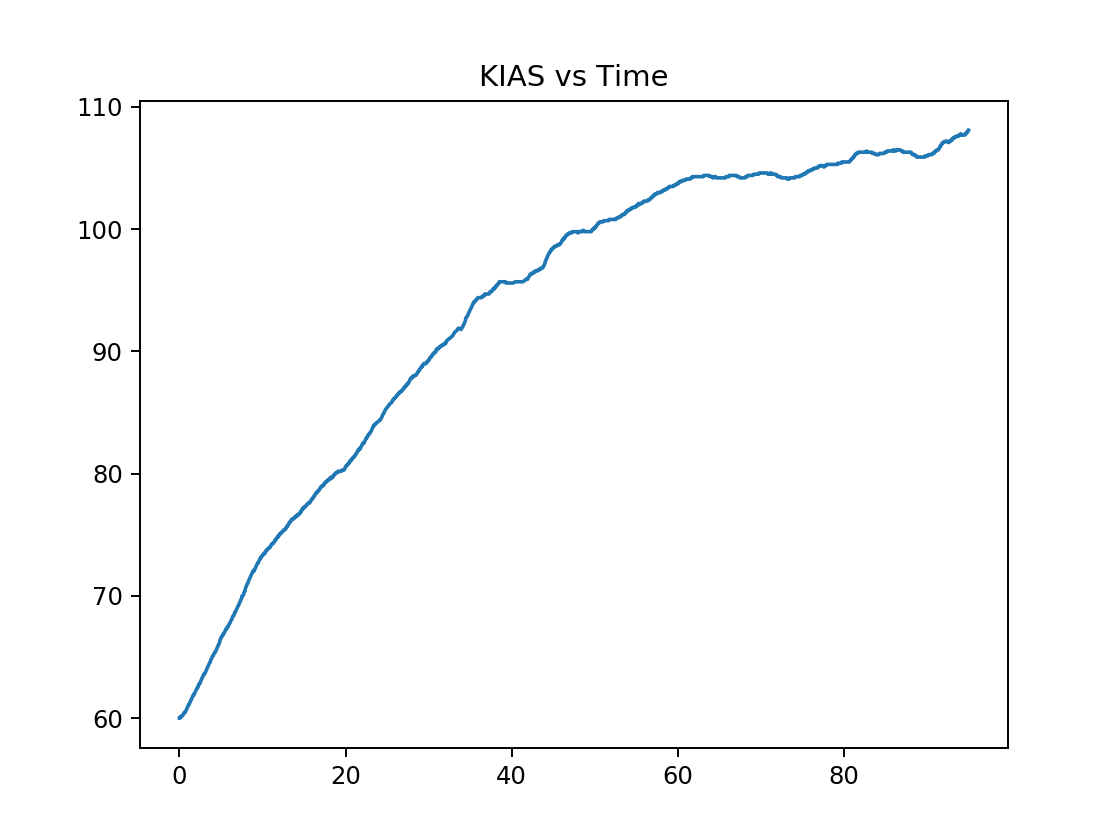

<IPython.core.display.Javascript object>


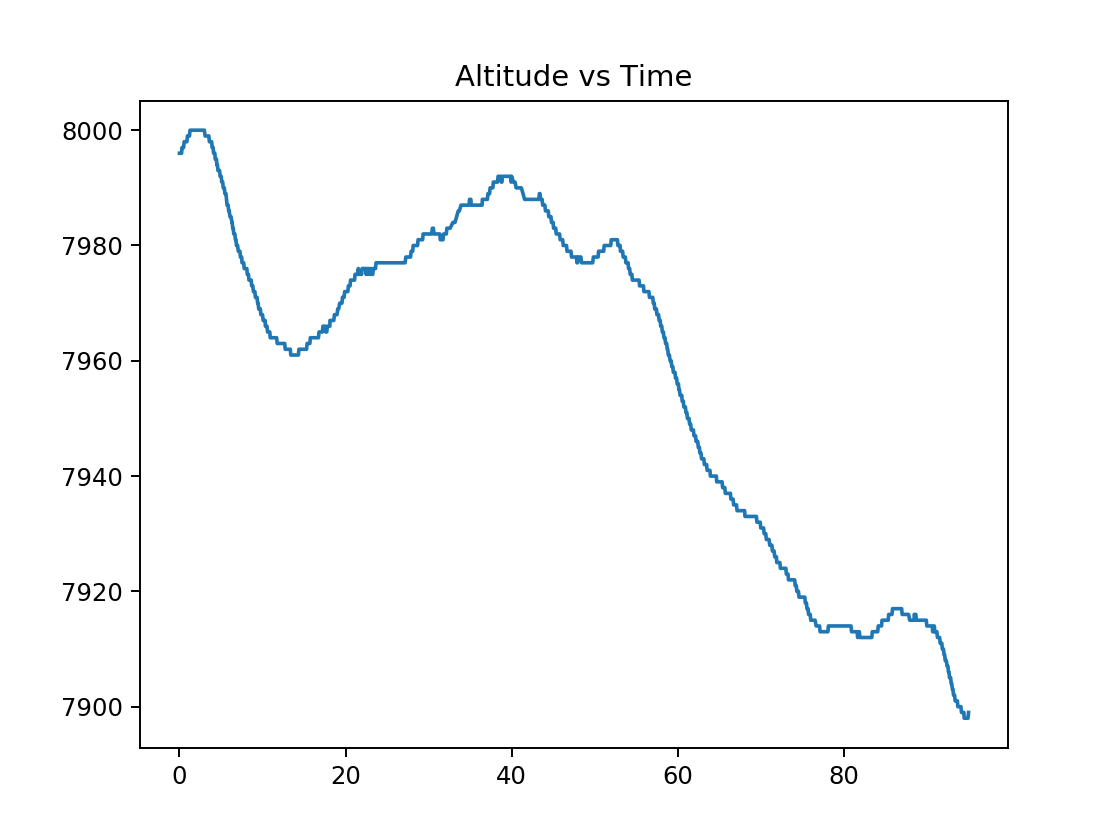

In [4]:
plt.figure()
plt.title("KIAS vs Time")
plt.plot(time, data['IASkt'])

plt.figure()
plt.title("Altitude vs Time")
plt.plot(time, data['Altitude']);

Calculate TAS from IAS, assuming ISA standard day and pressure altitude of 8000ft.

In [5]:
TASData = data["IASkt"] * 1.127

Let's create a 4th order polynomial in order to smooth out the noise in the TAS data.

In [6]:
TASPoly = np.polyfit(time, TASData, 4)
TASPoly

array([ 8.35357718e-07, -1.12549547e-04, -4.76448894e-03,  1.30503226e+00,
        6.85176924e+01])

Generate smoothed TAS data from the polynomial coefficients.

In [7]:
TASSmoothedData = TASPoly[0] * time**4 + TASPoly[1] * time**3 + TASPoly[2] * time**2 + TASPoly[3] * time + TASPoly[4]

Plot of the TAS data including the smoothed polynomial fit.

<IPython.core.display.Javascript object>


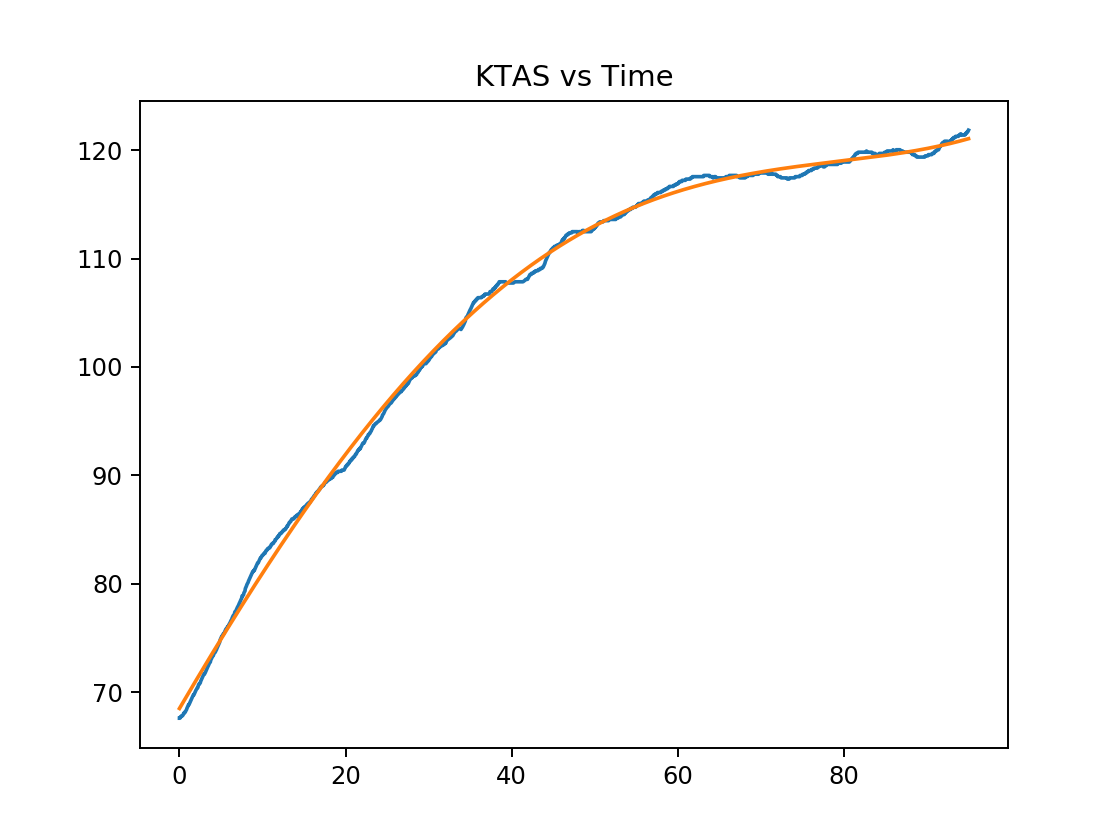

In [8]:
plt.figure()
plt.title("KTAS vs Time")
plt.plot(time, TASData)
plt.plot(time, TASSmoothedData);

Let's calculate the $dv/dt$ derivative from the TAS polynomial.

In [9]:
dvdtPolyCoefs = [ 4*TASPoly[0], 3*TASPoly[1], 2*TASPoly[2], 1*TASPoly[3] ]
dvdtPolyCoefs

[3.3414308717694343e-06,
 -0.0003376486413681056,
 -0.009528977879797472,
 1.3050322626950275]

Generate dv/dt data and plot it.

In [10]:
dvdtData = dvdtPolyCoefs[0] * time**3 + dvdtPolyCoefs[1] * time**2 + dvdtPolyCoefs[2] * time + dvdtPolyCoefs[3]

<IPython.core.display.Javascript object>


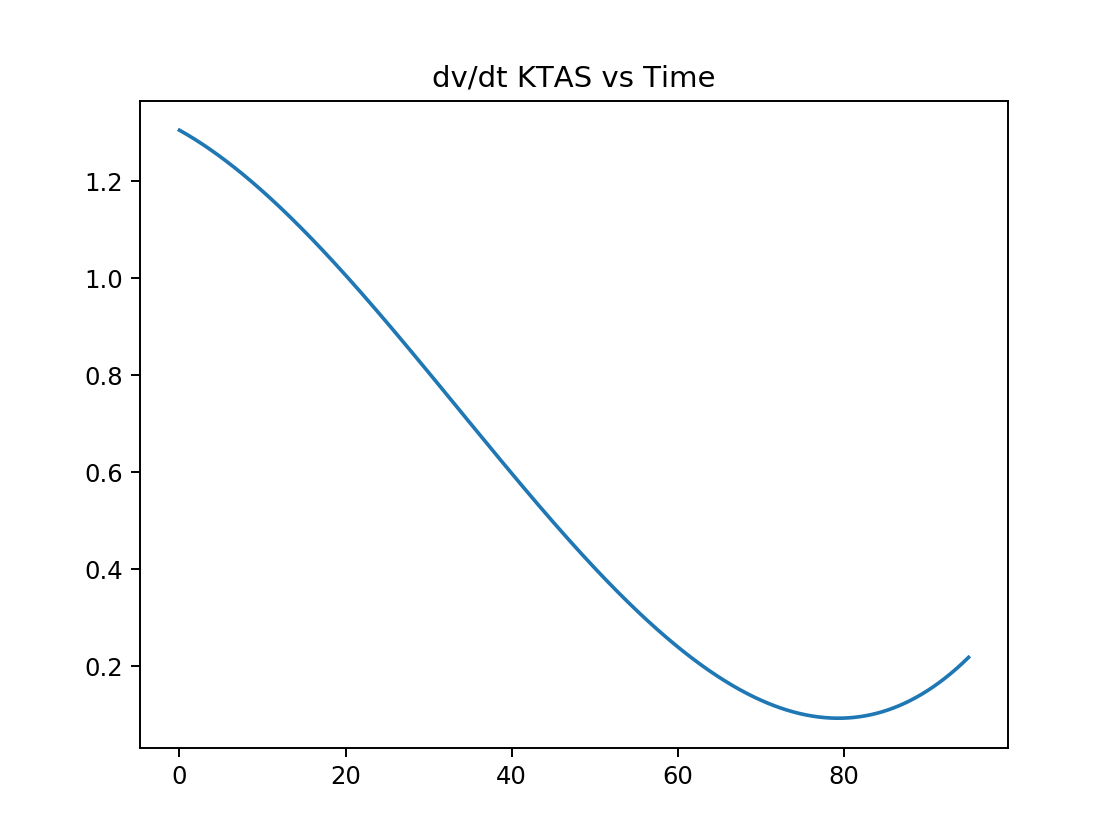

In [11]:
plt.figure()
plt.title("dv/dt KTAS vs Time")
plt.plot(time, dvdtData);

Now calculate:

$ \Large \frac{dH}{dt} = \frac{V_t}{g}  \frac{dV}{dt} $

In [12]:
g = 32.2           # ft/s^2
ktTofps = 1.68     # conversion from kt to ft/s
fpsTofpm = 60      # conversion from ft/s to ft/min

dHdtData = (((TASSmoothedData * ktTofps) / g) * dvdtData * ktTofps) * fpsTofpm

Generate smoothed IAS data from the smoothed TAS data. Again assuming ISA standard day at 8000ft.

In [13]:
IASSmoothedData = TASSmoothedData / 1.127

Finally let's plot dH/dt verus KIAS.

<IPython.core.display.Javascript object>


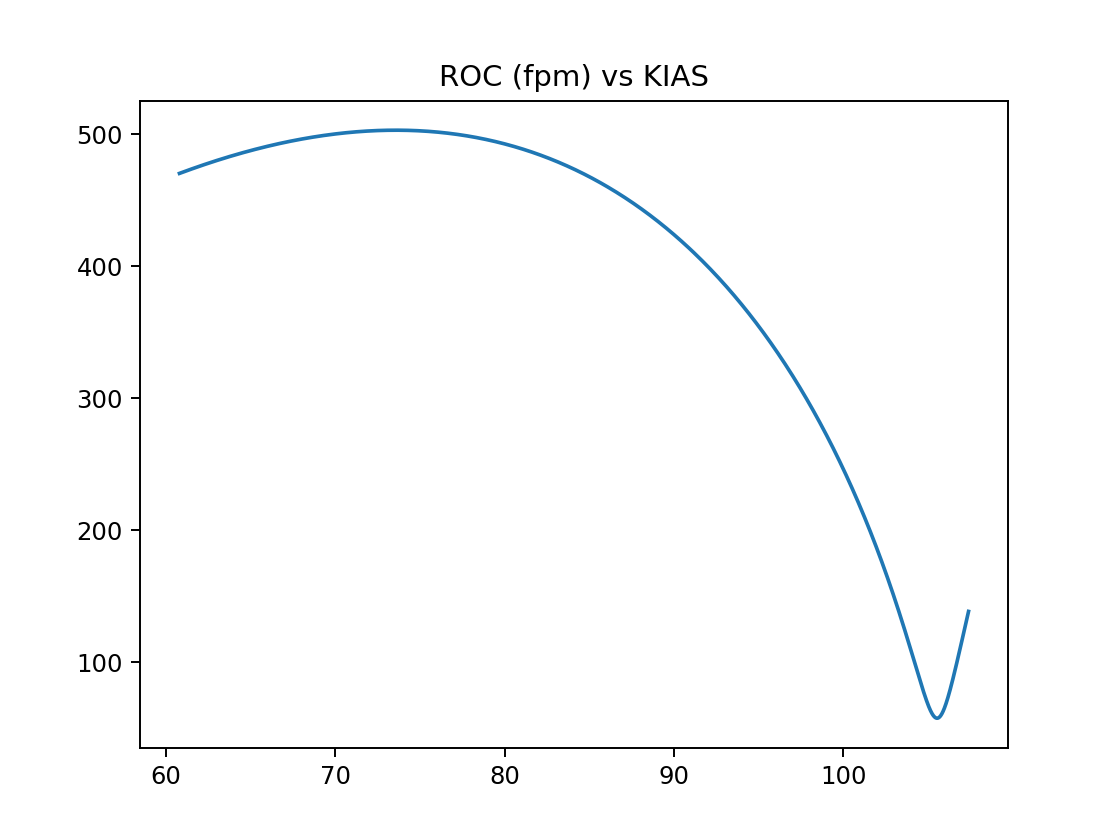

In [14]:
plt.figure()
plt.title("ROC (fpm) vs KIAS")
plt.plot(IASSmoothedData, dHdtData);

Now plot against unsmoothed KIAS.

<IPython.core.display.Javascript object>


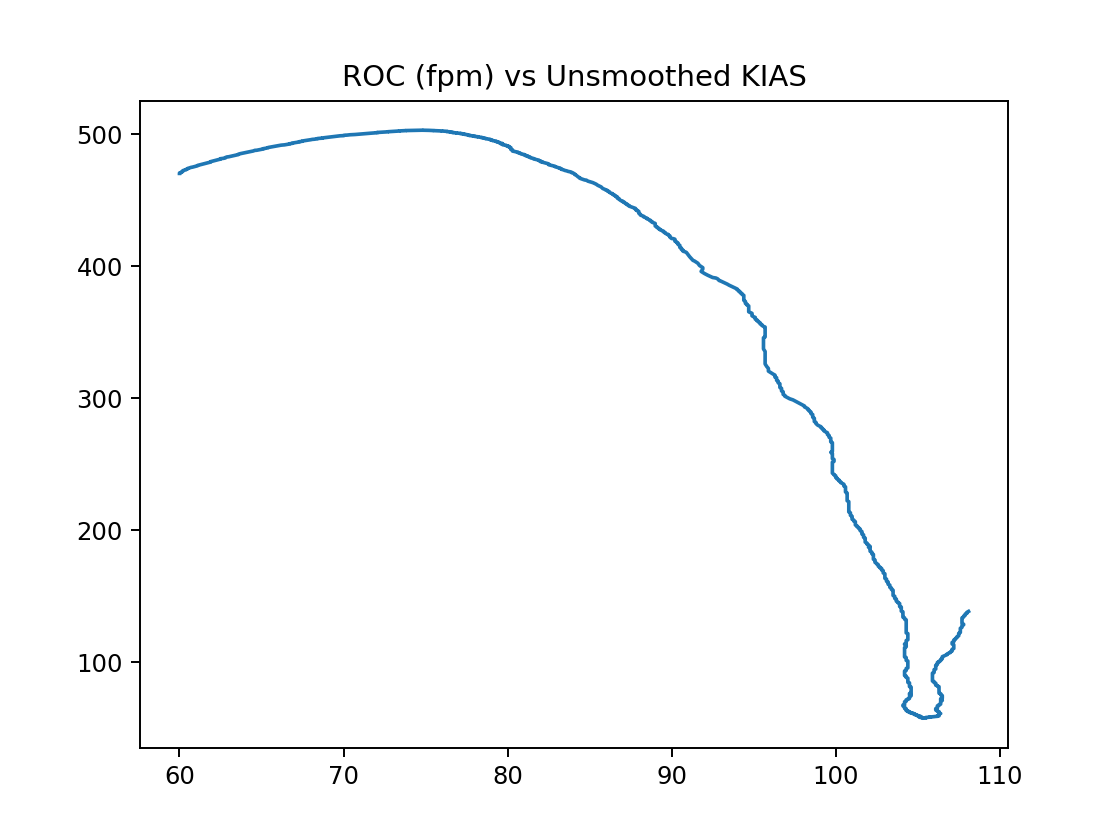

In [15]:
plt.figure()
plt.title("ROC (fpm) vs Unsmoothed KIAS")
plt.plot(data['IASkt'], dHdtData);